In [1]:
import pandas as pd,numpy as np ,sklearn,matplotlib.pyplot as plt,seaborn as sns

In [2]:
data=sns.load_dataset('titanic')

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
data.drop('deck',axis=1,inplace=True)

# Select ['age', 'fare', 'embarked_town', 'gender', 'pclass', 'survived'] cols from titanic dataset from seaborn


In [6]:
columns= ['age', 'fare', 'embark_town', 'sex', 'pclass', 'survived']
data =data[columns]
data

,age,fare,embark_town,sex,pclass,survived
0,22.0,7.2500,Southampton,male,3,0
1,38.0,71.2833,Cherbourg,female,1,1
2,26.0,7.9250,Southampton,female,3,1
3,35.0,53.1000,Southampton,female,1,1
4,35.0,8.0500,Southampton,male,3,0
...,...,...,...,...,...,...
886,27.0,13.0000,Southampton,male,2,0
887,19.0,30.0000,Southampton,female,1,1
888,NaN,23.4500,Southampton,female,3,0
889,26.0,30.0000,Cherbourg,male,1,1


In [7]:
data.isna().sum()

age            177
fare             0
embark_town      2
sex              0
pclass           0
survived         0
dtype: int64

# Handling missing values in embark_town Column

<Axes: xlabel='pclass', ylabel='count'>

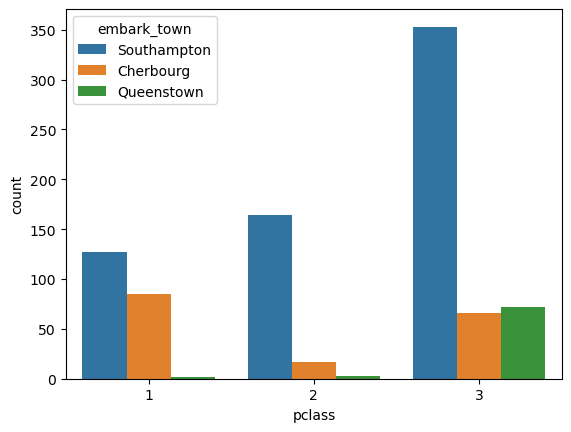

In [8]:
sns.countplot(data=data,x='pclass',hue='embark_town')

## To fill in the missing values in the "embarked" column, we should use the mode (the value that appears most frequently), as it is evident from the figure that the majority of people embarked from Southampton.

In [9]:
Data=data.copy()
Data['embark_town'].fillna('southampton',inplace=True)

In [10]:
# checking the null values in embark_town
Data.isna().sum()

age            177
fare             0
embark_town      0
sex              0
pclass           0
survived         0
dtype: int64

## Checking the distribution after impute the missing values in embark_town column with mode of that column

<Axes: xlabel='pclass', ylabel='count'>

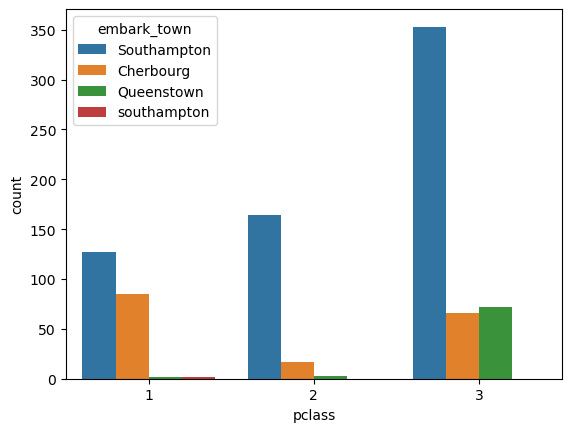

In [11]:
sns.countplot(data=Data,x='pclass',hue='embark_town')

### from the above figures ,before the missing values and after the imputing of missing values is looking very similar.

### so,we can conclude that, the appropriate  to filling the missing values in embark_town column with the mode.

# Identify and handle outliers in fare with appropriate technique.

In [12]:
fare_column=data['fare']
fare_column

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: fare, Length: 891, dtype: float64

<Axes: xlabel='fare'>

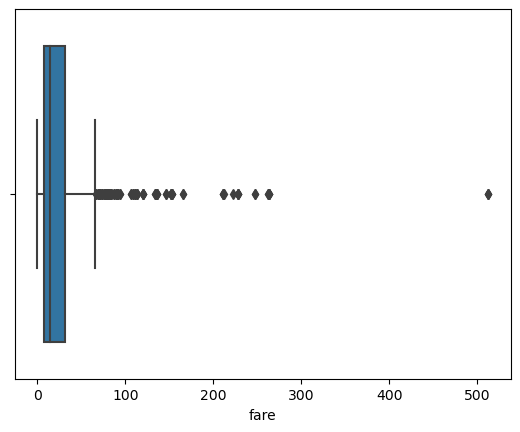

In [13]:
sns.boxplot(x='fare',data=data)

In [14]:
import numpy as np

In [15]:
## finding quartiles and IQR for the " fare " column.
Q1 = np.percentile(data['fare'],25)
Q3 = np.percentile(data['fare'],75)
Q2=np.percentile(data['fare'],50)
IQR = Q3 - Q1

In [16]:
Q1

7.9104

In [17]:
Q3

31.0

In [18]:
Q2

14.4542

In [19]:
import numpy as np

In [20]:
k = 1.5
#Calculate lowerfence and upperfence for the 'fare' column
lower_whisker = max(data['fare'].min(), Q1 - k * IQR)
upper_whisker = min(data['fare'].max(), Q3 + k * IQR)

print(f" Lower Whisker for 'fare': {lower_whisker} ")
print(f" Upper Whisker for 'fare': {upper_whisker} ")

 Lower Whisker for 'fare': 0.0 
 Upper Whisker for 'fare': 65.6344 


In [21]:
# finfing outliers with lower and upper whisker
outliers = data[(data['fare'] < lower_whisker) | (data['fare'] > upper_whisker)]

In [22]:
outliers

,age,fare,embark_town,sex,pclass,survived
1,38.0,71.2833,Cherbourg,female,1,1
27,19.0,263.0000,Southampton,male,1,0
31,NaN,146.5208,Cherbourg,female,1,1
34,28.0,82.1708,Cherbourg,male,1,0
52,49.0,76.7292,Cherbourg,female,1,1
...,...,...,...,...,...,...
846,NaN,69.5500,Southampton,male,3,0
849,NaN,89.1042,Cherbourg,female,1,1
856,45.0,164.8667,Southampton,female,1,1
863,NaN,69.5500,Southampton,female,3,0


In [23]:
data[(data['fare'] > 65.6344)] ### finding outliers after the upper limit


,age,fare,embark_town,sex,pclass,survived
1,38.0,71.2833,Cherbourg,female,1,1
27,19.0,263.0000,Southampton,male,1,0
31,NaN,146.5208,Cherbourg,female,1,1
34,28.0,82.1708,Cherbourg,male,1,0
52,49.0,76.7292,Cherbourg,female,1,1
...,...,...,...,...,...,...
846,NaN,69.5500,Southampton,male,3,0
849,NaN,89.1042,Cherbourg,female,1,1
856,45.0,164.8667,Southampton,female,1,1
863,NaN,69.5500,Southampton,female,3,0


In [24]:
data[data['fare'] < 0.0] ### finding outliers before the lower limit

,age,fare,embark_town,sex,pclass,survived


# Handling outliers in fare column

<Axes: xlabel='fare'>

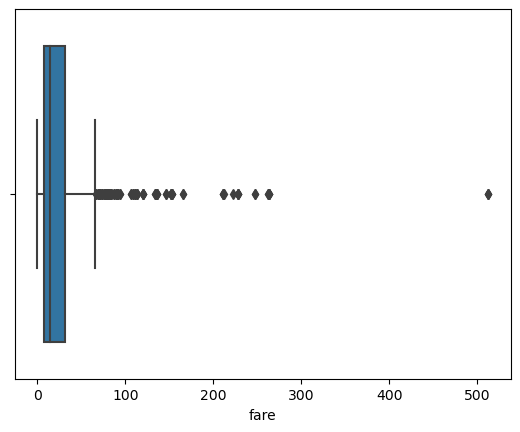

In [25]:
sns.boxplot(data=data,x='fare')

### Here we have outliers above the upperbound only.

<Axes: xlabel='clipped_data_of_fare'>

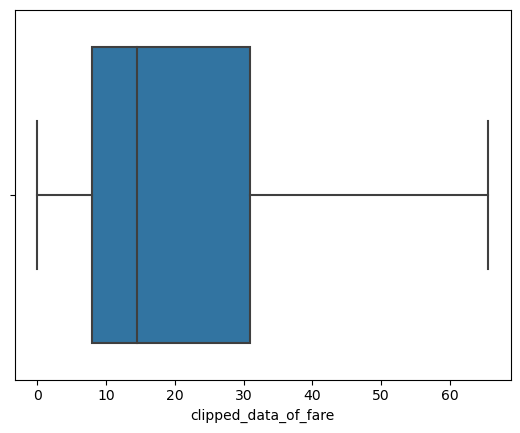

In [26]:
data_=data.copy()
data_['clipped_data_of_fare'] = data_['fare'].clip(lower=lower_whisker, upper=upper_whisker)
sns.boxplot(x='clipped_data_of_fare', data=data_)

## Hist plot of age column

<Axes: xlabel='age', ylabel='Count'>

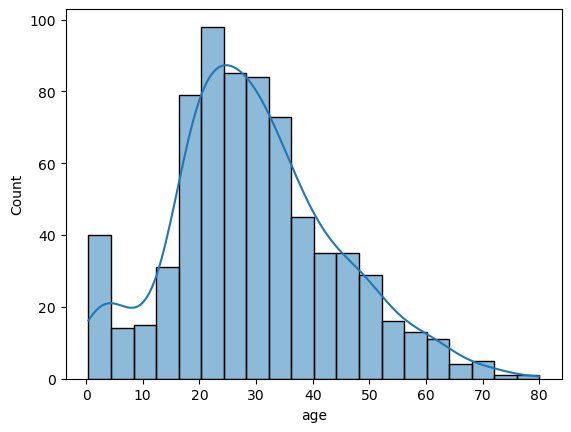

In [27]:
sns.histplot(x='age',data=data,kde=True)

# Imputing Missing Values 

## imputing the missing values in age column with the mean

In [28]:
data2=data.copy()
data2['age'].fillna(data['age'].mean(),inplace=True)
data2

,age,fare,embark_town,sex,pclass,survived
0,22.000000,7.2500,Southampton,male,3,0
1,38.000000,71.2833,Cherbourg,female,1,1
2,26.000000,7.9250,Southampton,female,3,1
3,35.000000,53.1000,Southampton,female,1,1
4,35.000000,8.0500,Southampton,male,3,0
...,...,...,...,...,...,...
886,27.000000,13.0000,Southampton,male,2,0
887,19.000000,30.0000,Southampton,female,1,1
888,29.699118,23.4500,Southampton,female,3,0
889,26.000000,30.0000,Cherbourg,male,1,1


<Axes: xlabel='age', ylabel='Count'>

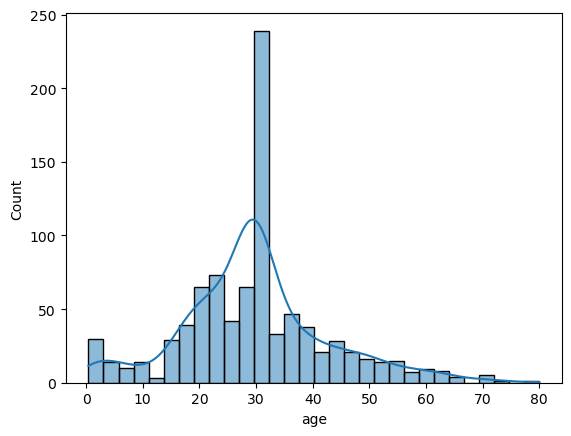

In [29]:
sns.histplot(x='age',data=data2,kde=True) 

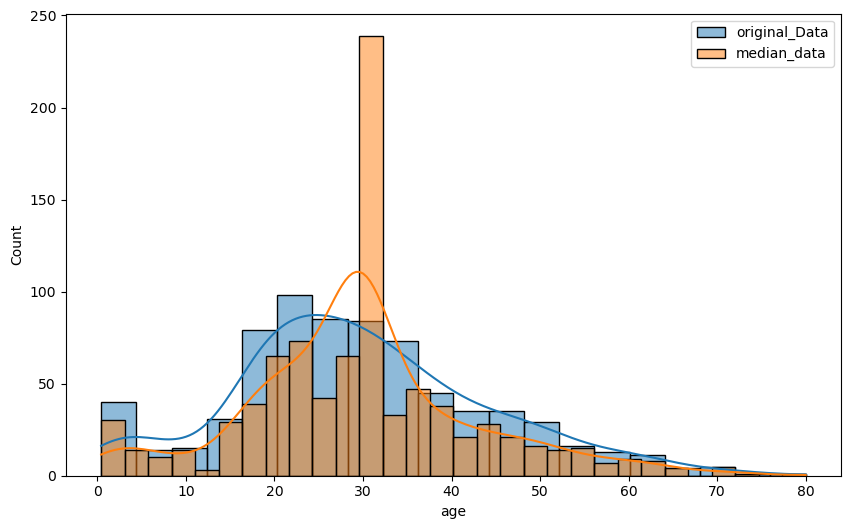

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original_Data')
sns.histplot(data=data2, x='age', kde=True, ax=ax, label='median_data')
ax.legend()
plt.show()

## imputing the null values with median()

In [31]:
data3=data.copy()
data3['age']=data['age'].fillna(data['age'].median())

<Axes: xlabel='age', ylabel='Count'>

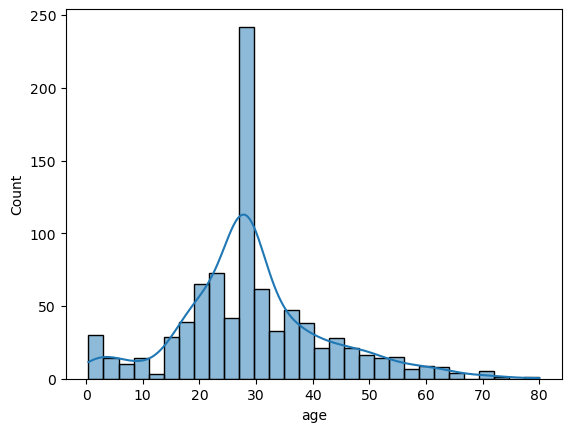

In [32]:
sns.histplot(x='age',data=data3,kde=True) ## median also not appropriate

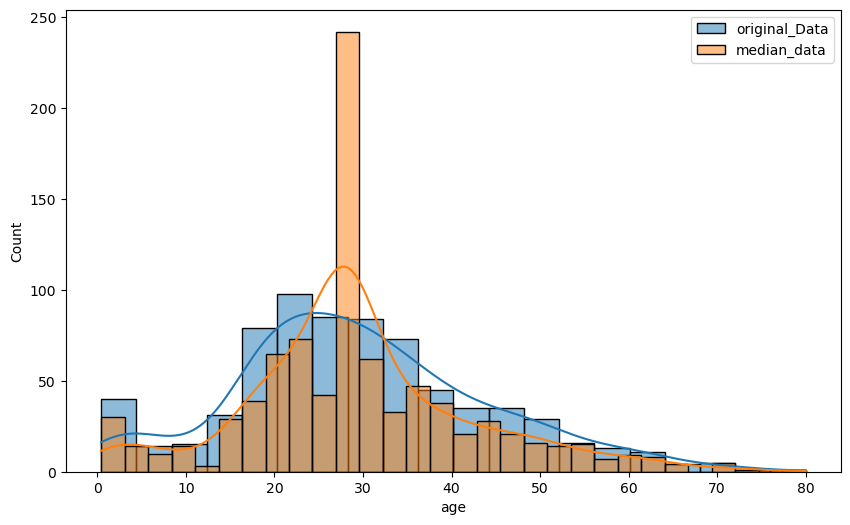

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original_Data')
sns.histplot(data=data3, x='age', kde=True, ax=ax, label='median_data')
ax.legend()
plt.show()

## Imputing missing values with mode ( )

In [34]:
data4=data.copy()

<Axes: xlabel='age', ylabel='Count'>

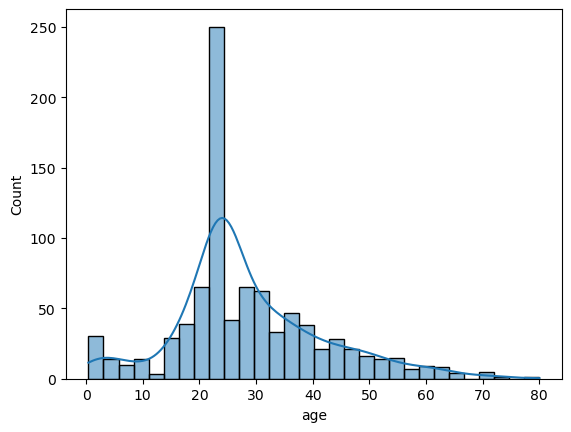

In [35]:
data4['age'].fillna(24.0,inplace=True) ## imputing the missing values with the mode of age column
sns.histplot(x='age',data=data4,kde=True)

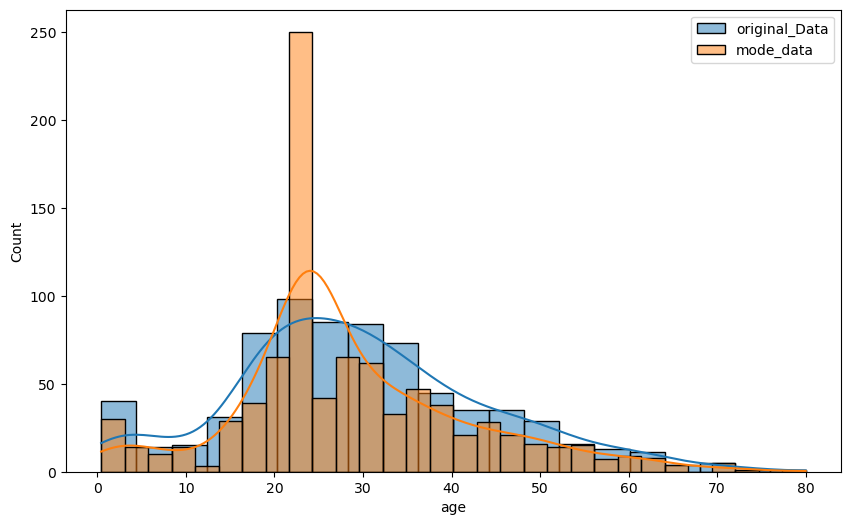

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original_Data')
sns.histplot(data=data4, x='age', kde=True, ax=ax, label='mode_data')
ax.legend()
plt.show()

## Imputing the missing values with ffill ( )

<Axes: xlabel='age', ylabel='Count'>

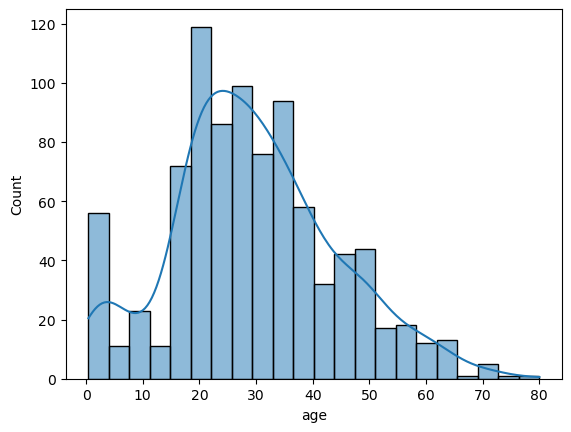

In [37]:
data5=data.copy()
data5['age']=data['age'].ffill() ## forward filling 
sns.histplot(x='age',data=data5,kde=True)## it gives correct,but it crossing the count

In [38]:
import matplotlib.pyplot as plt

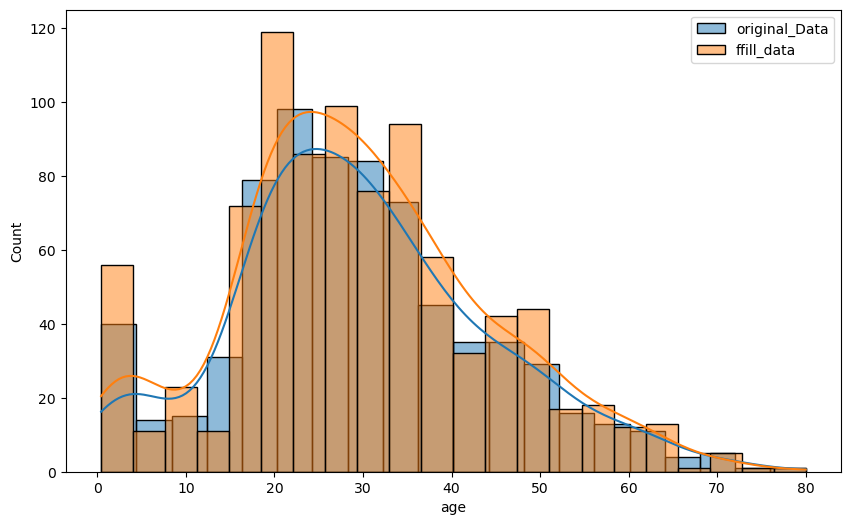

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original_Data')
sns.histplot(data=data5, x='age', kde=True, ax=ax, label='ffill_data')
ax.legend()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

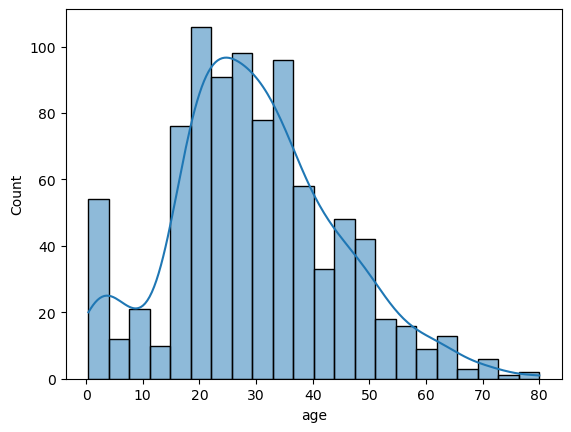

In [40]:
data6=data.copy()
data6['age']=data['age'].bfill() ## backward filling 
sns.histplot(x='age',data=data6,kde=True)

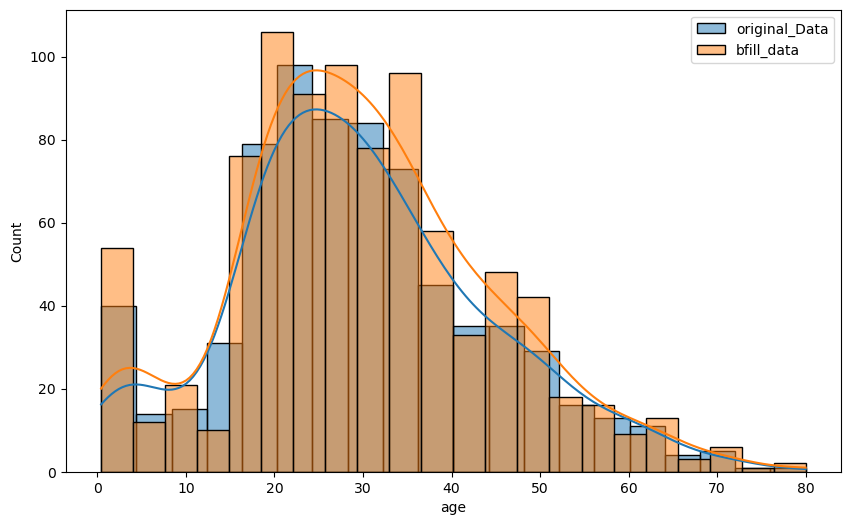

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original_Data')
sns.histplot(data=data6, x='age', kde=True, ax=ax, label='bfill_data')
ax.legend()
plt.show()

## imputing the missing values with interpolate ( )

<Axes: xlabel='age', ylabel='Count'>

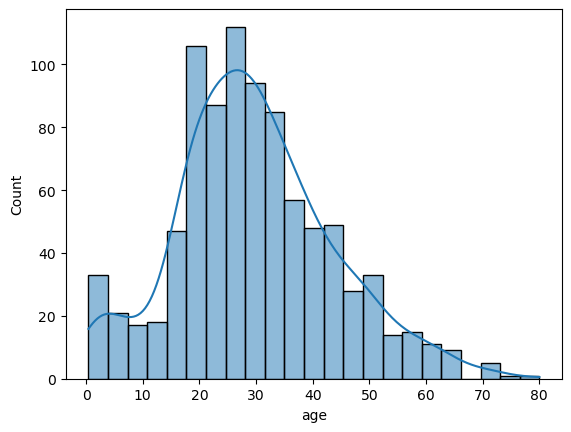

In [42]:
data7=data.copy()
data7['age']=data['age'].interpolate() 
sns.histplot(data=data7,x='age',kde=True)

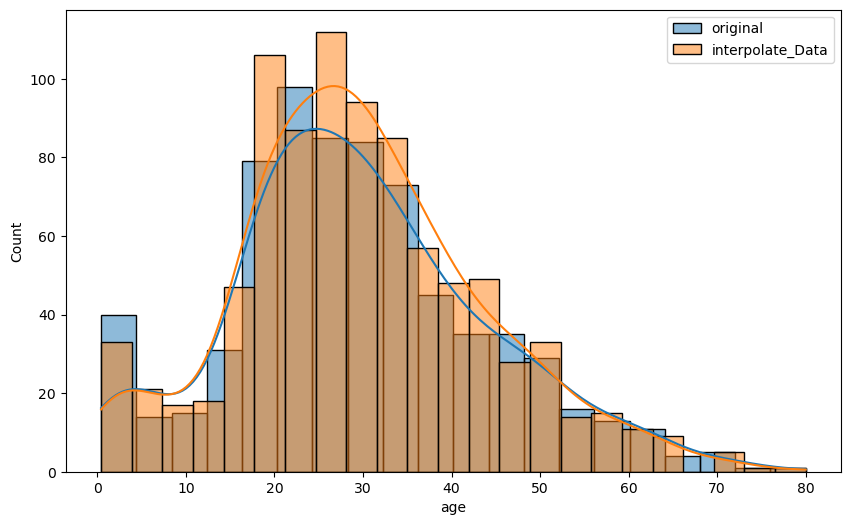

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=data, x='age', kde=True, ax=ax, label='original') ## subplots (ffill and before missing values)
sns.histplot(data=data7, x='age', kde=True, ax=ax, label='interpolate_Data')
ax.legend()
plt.show()

## From the above techniques ,
## these techniques [" ffill "," bfill "," interpolate " ] are giving very similar distributions after imputing the missing values .
## But, the appropriate method to impute the missing values in age column is , interpolate.

In [44]:
# im imputing the missing values of age column in original data with interpolate 

In [45]:
main_data=Data.copy()
main_data['age']=data['age'].interpolate()

In [46]:
main_data.isna().sum()

age            0
fare           0
embark_town    0
sex            0
pclass         0
survived       0
dtype: int64

# Univariant Analysis[visualization] : 

## Histogram for fare column 

<Axes: xlabel='fare', ylabel='Count'>

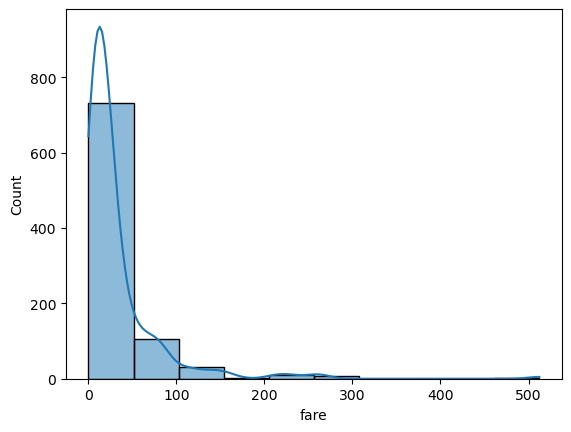

In [47]:
#sns.histplot(main_data['fare'],bins=10,kde=True)
sns.histplot(main_data['fare'],bins=10,kde=True)

## Distplot for fare column

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_32492\1384830311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_data['fare'],bins=10,kde=True)


<Axes: xlabel='fare', ylabel='Density'>

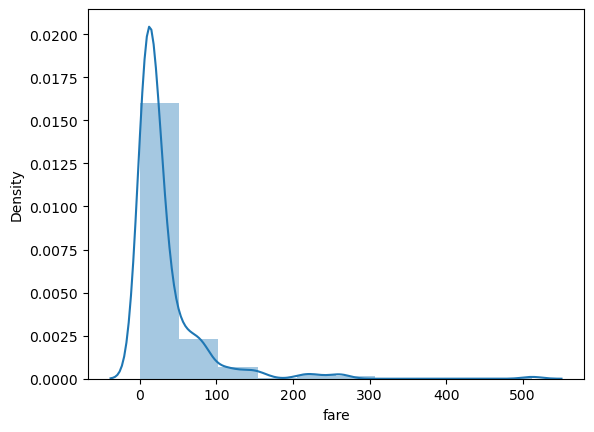

In [48]:
sns.distplot(main_data['fare'],bins=10,kde=True)

## line chart for fare column

<Axes: >

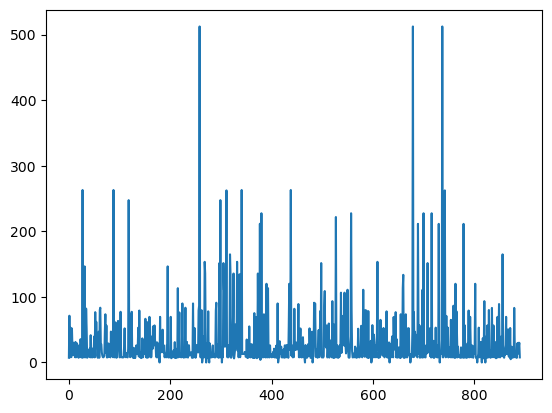

In [49]:
main_data['fare'].plot()

## Histplot for age column

<Axes: xlabel='age', ylabel='Count'>

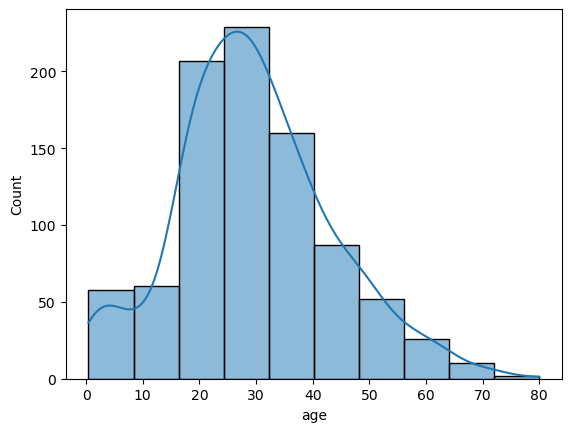

In [50]:
sns.histplot(main_data['age'],bins=10,kde=True)

## Distplot for age column 

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_32492\846493784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(main_data['age'],bins=10,kde=True)


<Axes: xlabel='age', ylabel='Density'>

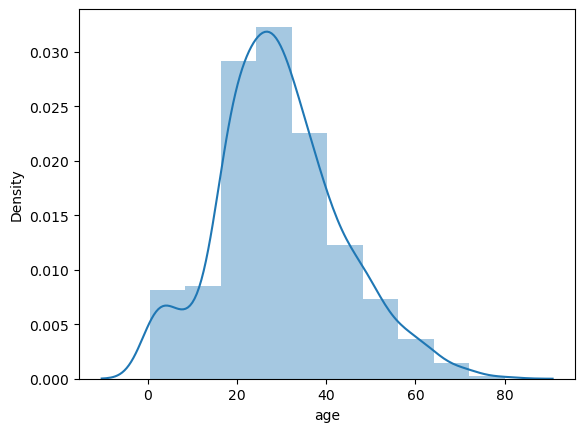

In [51]:
sns.distplot(main_data['age'],bins=10,kde=True)

## line chart for age column 

<Axes: >

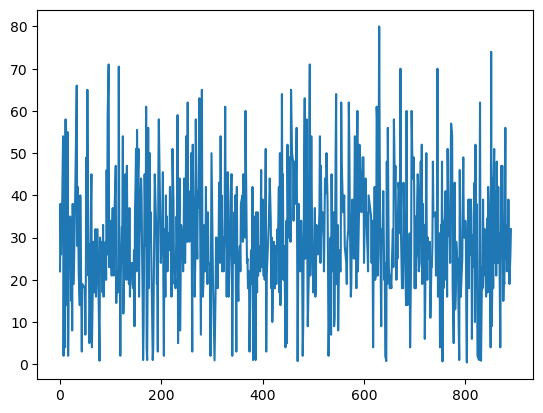

In [52]:
main_data['age'].plot()

## Count plot for Gender column

<Axes: xlabel='sex', ylabel='count'>

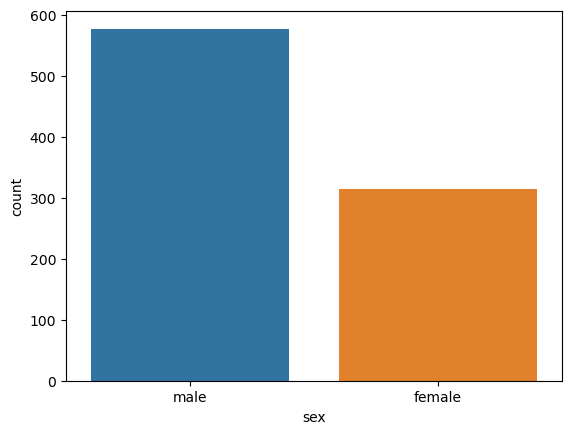

In [53]:
sns.countplot(x='sex',data=data)

## count plot for pclass 

<Axes: xlabel='pclass', ylabel='count'>

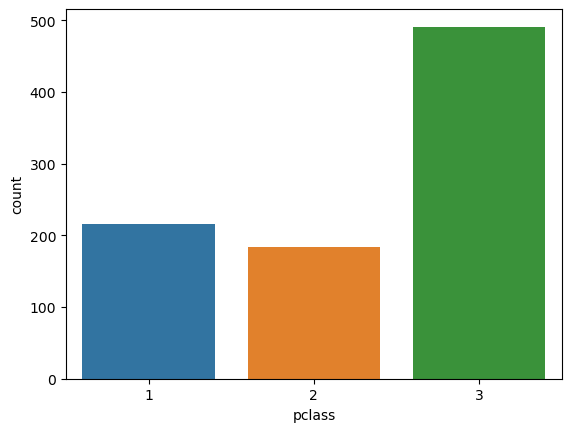

In [54]:
sns.countplot(x='pclass',data=data)

## count plot for Embark_town `

<Axes: xlabel='embark_town', ylabel='count'>

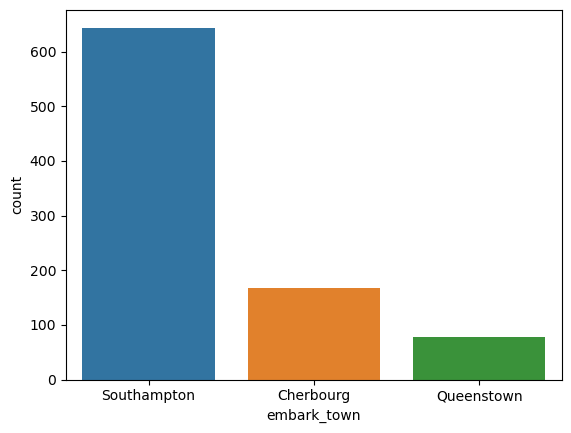

In [55]:
sns.countplot(x='embark_town',data=data)

# Bivariant Analysis :

<Axes: xlabel='age', ylabel='Count'>

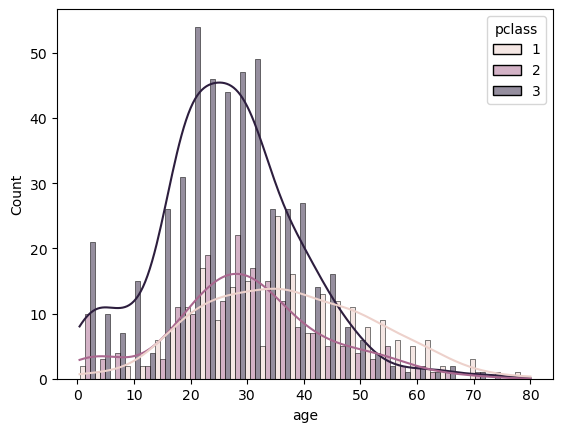

In [69]:
sns.histplot(x='age', hue='pclass', data=main_data, bins=30, kde=True,multiple='dodge')

<Axes: xlabel='survived', ylabel='Count'>

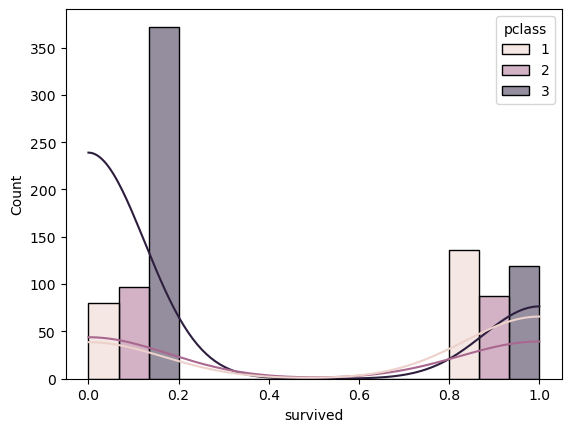

In [73]:
sns.histplot(x='survived', hue='pclass', data=main_data, bins=5, kde=True,multiple='dodge')

# Univariant analysis ( Non-visual ) :

In [58]:
main_data.describe(include='object')

,embark_town,sex
count,891,891
unique,4,2
top,Southampton,male
freq,644,577


In [59]:
main_data['fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [60]:
main_data['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [61]:
main_data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [62]:
main_data['age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: age, dtype: float64

## bi-variant analysis :

In [63]:
main_data.groupby('pclass')['age'].value_counts()

pclass  age   
1       36.000    10
        35.000     9
        30.000     7
        24.000     7
        22.000     6
                  ..
3       18.800     1
        19.375     1
        1.375      1
        0.420      1
        74.000     1
Name: count, Length: 262, dtype: int64

In [64]:
main_data.groupby('pclass')['fare'].value_counts()

pclass  fare   
1       26.5500    15
        52.0000     7
        53.1000     5
        0.0000      5
        30.5000     5
                   ..
3       7.8750      1
        7.8000      1
        7.7875      1
        7.7417      1
        7.0458      1
Name: count, Length: 255, dtype: int64

In [65]:
main_data.groupby('pclass')['survived'].value_counts()

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64